In [546]:
import numpy as np
import pandas as pd
import itertools
from itertools import combinations
from itertools import chain
import time

import random

In [547]:
df = pd.read_csv("HW3_data.csv")
df = df.fillna('')
df.head()


,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75
0,31,32,33,,,,,,,,...,,,,,,,,,,
1,34,35,36,,,,,,,,...,,,,,,,,,,
2,37,38,39,40,41,42,43,44,45,46,...,,,,,,,,,,
3,39,40,48,49,,,,,,,...,,,,,,,,,,
4,39,40,49,50,51,52,53,54,55,56,...,,,,,,,,,,


In [548]:
def remove_emptystrings(x_p):
    for i in range(len(x_p)): 
        while("" in x_p[i]):
            x_p[i].remove("")
    return(x_p)

In [549]:
df_lol = df.values.tolist()
df_lol = remove_emptystrings(df_lol)
all_count = {}

In [569]:
def randome(listoflists, per):
    lists = random.sample(listoflists, int(len(listoflists)*(per/100)))
    return(lists)
df_lol_20 = (randome(df_lol,20))

In [570]:
def support1(df_lol, out, count, dic,support_per): 
    if count ==1:
        flat_list = [int(item) for sublist in df_lol for item in sublist]
        #print(len(set(flat_list)))
        def counting(listy):
            d= {}
            for i in listy:
                if i in d:
                    d[(i)] = d[i]+1
                else:
                    d[(i)] = 1
            return(d)
        global d
        d = counting(flat_list)
        out = ([k for (k,v) in d.items() if v >= len(df_lol)*support_per])
        dic[count] = out
        count = count+1
        return support1(df_lol,out,count,dic,support_per)
    else:
        temp = list(combinations(out,count))
        test1 = list(map(lambda x: list(x),temp))
        listy1 = []
        for i in test1:
            counting1 = 0
            for j in df_lol:
                result =  all(elem in j  for elem in i)
                if result == True:
                    counting1 = counting1 +1
                else:
                    pass
            if counting1 >= int(len(df_lol)*support_per):
                all_count[tuple(i)] = counting1
                listy1.append(i)
        if len(listy1) == 0:
            return(dic)
        else:
            dic[count] = listy1
            flat_list = [int(item) for sublist in listy1 for item in sublist]
            out = list(set(flat_list))
            count = count+1
            return(support1(df_lol,out,count,dic,support_per))
                
     

In [571]:
start_time = time.time()
out  = None
dic = {}
count =1
support_per = .01
print(support1(df_lol_20,out,count,dic,support_per))
print("--- %s seconds ---" % (time.time() - start_time))

                #print(lift)
                    
                    
                #print(numerator)



{1: [40, 49, 61, 33, 42, 66, 118, 124, 259, 1328, 38, 39, 102, 148, 16011, 10, 37, 111, 80, 202, 311, 534, 176, 79, 593, 162, 414, 1147, 2959, 439, 825, 12926, 13042, 1579, 1005, 186, 238, 741, 171, 678, 90, 590, 957, 271, 784, 372, 3271, 2239, 77, 549, 14099, 302, 406, 46, 339, 16218, 250, 1394, 50, 226, 272, 476, 523, 20, 1601, 180, 10516, 704, 287, 480, 256, 15833, 32, 605], 2: [[40, 49], [40, 61], [40, 33], [40, 42], [40, 66], [40, 1328], [40, 39], [40, 102], [40, 148], [40, 37], [40, 111], [40, 80], [40, 311], [40, 534], [40, 414], [40, 1147], [40, 439], [40, 12926], [40, 238], [40, 171], [40, 90], [40, 271], [40, 2239], [40, 226], [40, 272], [40, 476], [40, 287], [40, 256], [49, 33], [49, 42], [49, 66], [49, 1328], [49, 39], [49, 102], [49, 148], [49, 37], [49, 111], [49, 80], [49, 311], [49, 534], [49, 414], [49, 439], [49, 238], [49, 171], [49, 90], [49, 271], [49, 2239], [49, 226], [49, 272], [49, 476], [49, 256], [33, 42], [33, 39], [42, 66], [42, 39], [38, 39], [39, 37], [39

In [572]:
#number of frequent Itemsets
total = 0
for i in range(1,len(dic.keys())+1):
    total  = total+len(dic[i])
print(total)

168


In [573]:
resultant_rules = []
initial_list = ["left_side", "right_side", "confidence", "numerator", "lift"]
resultant_rules.append(initial_list)
z = {**d, **all_count}
for i in range(2,len(dic.keys())+1):
    for j in range(len(dic[i])):
        temp = dic[i][j]
        #print(temp)
        for l in range(1,len(temp)):
            temp1 = (combinations(temp,l))
            for m in list(temp1):
                copy = temp.copy()
                copy =set(copy)
                #print(copy)
                remain = list(copy-set(m))
                #print(remain)
                ls = []
                numerator= z[tuple(temp)]
                #print(temp)
                x1 = int(str(m[0]).rstrip(','))
                denominator = z[x1]
                confidence = numerator/denominator 
                lift = confidence/z[remain[0]]
                if confidence > .05:
                    ls.append(m)
                    ls.append(remain)
                    ls.append(confidence)
                    ls.append(numerator)
                    ls.append(lift)
                    resultant_rules.append(ls)
print(len(resultant_rules))
#from __future__ import with_statement
with open('2%_20%', 'w') as f:
    for _list in resultant_rules:
        for _string in _list:
            #f.seek(0)
            f.write(str(_string) + ' ')
        f.write("\n ")

239


In [516]:
d_1  = dic #for the support 1%

In [517]:
d_2 = dic  #for the support 2%

In [504]:
d_3 = dic    #for the support 5%

In [525]:
ls = []
for i in d_1.values():
    ls.append(i)
flat_list = [item for sublist in ls for item in sublist]
ls_1 = []
for i in dic.values():
    ls_1.append(i) 
flat_list_1 = flat_list = [item for sublist in ls_1 for item in sublist]

False_Positives = 0
for i in range(len(flat_list)):
    if flat_list[i] not in flat_list_1:
        False_Positives += 1
False_Negative = 0
for i in range(len(flat_list_1)):
    if flat_list_1[i] not in flat_list:
        False_Negative += 1
#print(False_Positives)
#print(False_Negative)
        

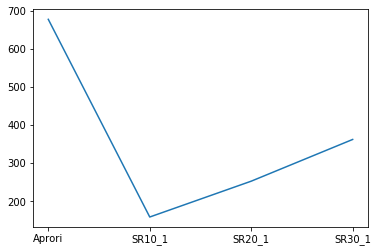

In [568]:
import matplotlib.pyplot as plt 
y = [677.0795619487762 ,157.8045938014984, 251.92460298538208 ,361.52341294288635 ]
x = [ "Aprori","SR10_1","SR20_1","SR30_1"]
plt.plot(x,y)
plt.show()